# Home price prediction 


1. Simple Linear Regression
2. Mutiple Liner Regression

#Import Python libaries

In [219]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Importing datasets

In [210]:
data = pd.read_csv('Housing.csv')


In [211]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   basement         545 non-null    object
 8   hotwaterheating  545 non-null    object
 9   airconditioning  545 non-null    object
 10  parking          545 non-null    int64 
 11  prefarea         545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [214]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [215]:
data.shape

(545, 12)

#Select only non-categorical columns

In [223]:
non_categorical_data = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]


#Calculate correlation matrix

In [221]:
corr_matrix = non_categorical_data.corr()

#Plot heatmap

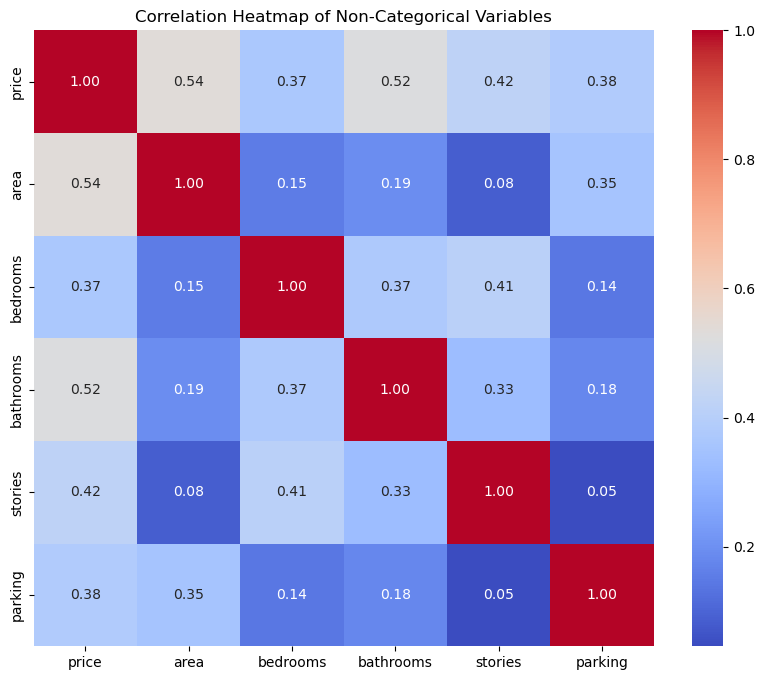

In [222]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Non-Categorical Variables')
plt.show()

# 1. Simple Linear Regression

#Extracting Independent and dependent Variable

X and y

In [249]:

X= data.loc[:,"area"]
y= data.loc[:,'price']


#Reshape X

In [230]:
X = np.array(X).reshape(-1,1)
print(X.shape)

(545, 1)


#Set up a linear regression model

In [231]:
regressor= LinearRegression()

#Train the model

In [232]:
regressor.fit(X,y)

LinearRegression()

#Calculate predicted values


In [233]:
y_predict_1 = regressor.predict(X)

#Print the first 5 predicted values

In [234]:
print(y_predict_1[:5]) 

[5815162.19790048 6526603.53508057 6988578.42935335 5852120.18944231
 5815162.19790048]


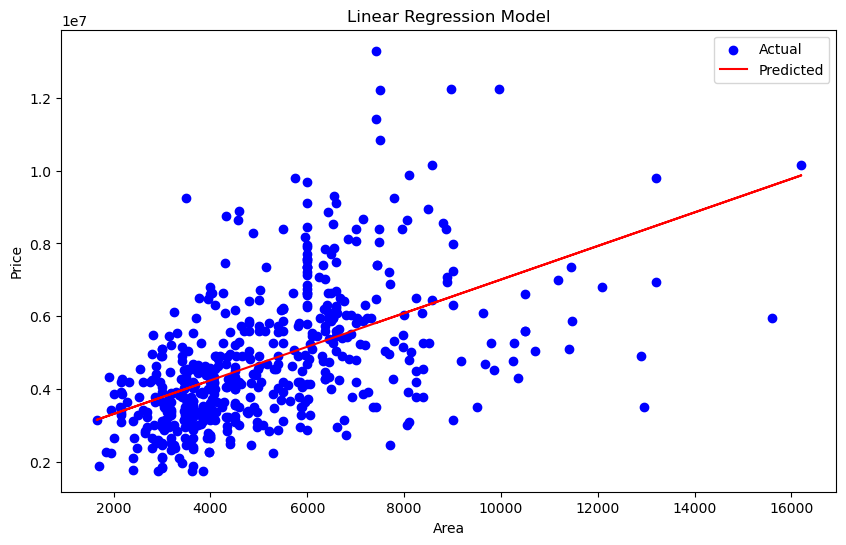

In [235]:

# Visualize the model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_predict_1, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()



#Calculate mean squared error

In [237]:
# Calculate mean squared error
mse = mean_squared_error(y, y_predict_1)
print("Mean Squared Error:", mse)

Mean Squared Error: 2488861398180.657


#Calculate R-squared score

In [238]:
r2 = r2_score(y, y_predict_1)
print("R-squared Score:", r2)

R-squared Score: 0.2872931546811468


predict the price:

In [239]:
area1=6004
# Reshape the area value(s) to match the input shape expected by the model
area1 = np.array(area1).reshape(-1, 1)
# Use the trained model to predict the price for the given area value(s)
predicted_area=regressor.predict(area1)
print("Predicted Price:", predicted_area)

Predicted Price: [5161005.74761022]


# 2.Multiple Linear Regression

In [240]:
# define X_multi, will only include non-category data for this exercises
X_multi = non_categorical_data.drop(["price"],axis=1) 
#non_categorical_data already defined in section 1
print(X_multi.head())

   area  bedrooms  bathrooms  stories  parking
0  7420         4          2        3        2
1  8960         4          4        4        3
2  9960         3          2        2        2
3  7500         4          2        2        3
4  7420         4          1        2        2


#Set up mutiple linear model

In [241]:
regressor_multi=LinearRegression()


#Train the model

In [242]:
regressor_multi.fit(X_multi,y)

LinearRegression()

#Calculate predicted values

In [243]:
y_predict_multi =regressor_multi.predict(X_multi)

#Print the first 5 predicted values

In [244]:
print(y_predict_multi[:5]) 

[ 7648873.96926545 11351808.25562893  7774157.72976678  7505019.68808916
  5967193.99706753]


#Visualize the model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


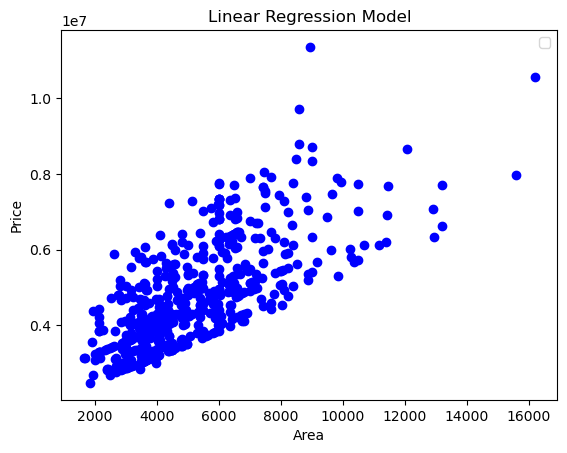

In [245]:
plt.scatter(X, y_predict_multi, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

#Calculate mean squared error

In [247]:
mse_multi = mean_squared_error(y, y_predict_multi)
print("Mean Squared Error Multi:", mse_multi)

Mean Squared Error Multi: 1531008562668.3982


#Calculate R-squared score

In [248]:
r2_multi = r2_score(y, y_predict_multi)
print("R-squared Score Multi:", r2_multi)

R-squared Score Multi: 0.5615825438679802


Conclution:

Simple linear model:

   Mean Squared Error: 2.49 trillion

      R-squared Score: 0.29

Multiple linear model:

   Mean Squared Error: 1.53 trillion

      R-squared Score: 0.56
   
*  The second model has better performance than the first model